# Youtube Likes,views Prediction

## Table of content
* 1.Machine Learning Formulation
    * 1.1 Data Overview
    * 1.2  Attribute-information
* 2.EDA
* 3.Feature Engineering
    * 3.1 publish_weekday-Day at which video is publish
    * 3.2 No of Tags-No of tag video contain
    * 3.3 Length of description-Length of video description
    * 3.4 Ratio's
         * 3.4.1 Ratio of View and likes
         * 3.4.2 Ratio of view and dislikes
         * 3.4.3 Ratio of view and comment_count
         * 3.4.4 Ratio of likes and dislikes
* 4.Correlation matrix
* 5.Machine Learning(metric=r^2 score )
    * 5.1-View Predicition
         * 5.1.1-Splitting the data into train and Test(80:20)
         * 5.1.2-Linear Regression
         * 5.1.3-Random Forest
              
  * 5.2 -Like Predicition
       * 5.2.1-Splitting the data into train and Test(80:20)
       * 5.2.2-Linear Regression
       * 5.2.3-Random Forest
       
  * 5.3-comment Count Predicition
      * 5.3.1-Splitting the data into train and Test(80:20)
      * 5.3.2-Linear Regression
      * 5.3.3-Random Forest
      
* 6.Conclusion

## 1.Machine Learning Formulation
### 1.1 Data Overviews
Contain one file

#### 1.2 Attribute-information
* video_id-Unique video id
* trending_date-the date at which video start trending
* title-Title of video
* channel_title-video posted by channel
* category_id-there are 15 Category value
* publish_time-at what time video is uplaoded
* tags-tag given to video
* views-no of views
* likes-no of likes
* dislikes-no of dislikes
* comment_count-no of comment




## 2.EDA

### Loading Libary

In [142]:
#Loading library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import r2_score


In [143]:
youtube = pd.read_csv("USvideos.csv")


In [144]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [145]:
print(youtube.shape)

(40949, 16)


In [146]:
print(youtube.isnull().values.any())

True


In [147]:
youtube = youtube.dropna(how='any',axis=0)

In [148]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [149]:
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [150]:
youtube.apply(lambda x: len(x.unique()))

trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

False    39775
True       604
Name: comments_disabled, dtype: int64


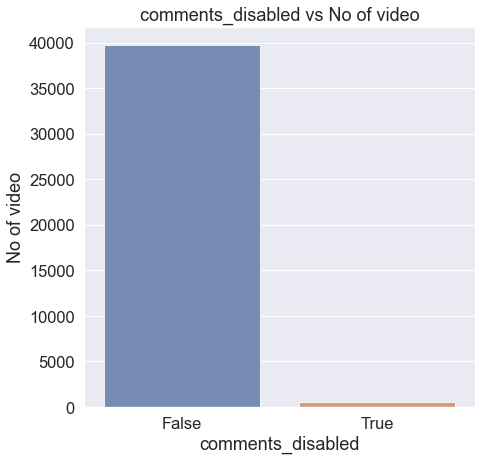

False    40210
True       169
Name: ratings_disabled, dtype: int64


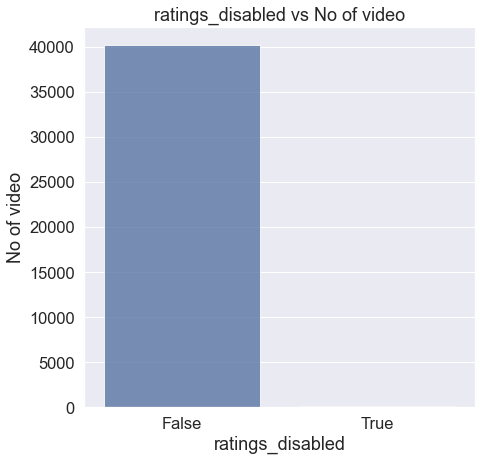

False    40358
True        21
Name: video_error_or_removed, dtype: int64


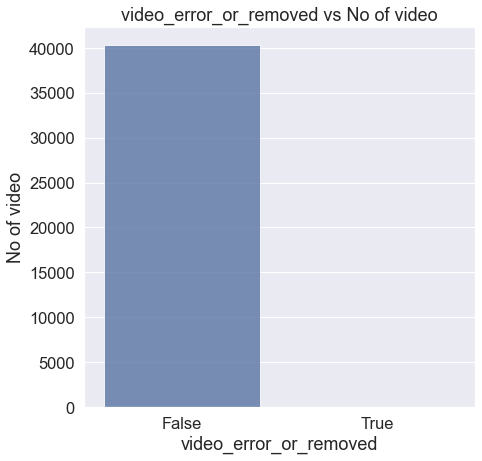

24    9819
10    6437
26    4140
23    3435
22    3061
25    2409
28    2361
1     2340
17    2125
27    1642
15     916
20     803
19     402
2      379
43      57
29      53
Name: category_id, dtype: int64


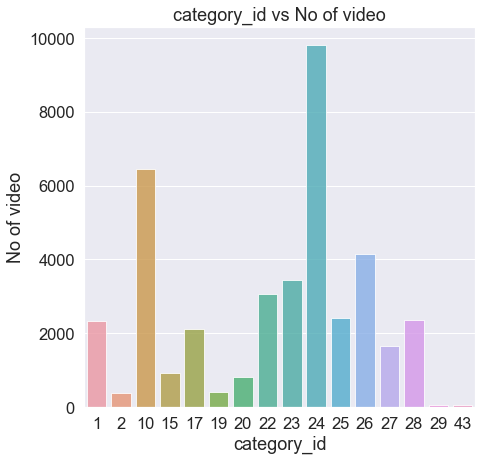

In [151]:
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(7,7))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

## 3.Feature Engineering

 * 3.1 publish_weekday-Day at which video is publish
 * 3.2 No of Tags-No of tag video contain
 * 3.3 Length of description-Length of video description
 * 3.4 Ratio's
    * 3.4.1 Ratio of View and likes
    * 3.4.2 Ratio of view and dislikes
    * 3.4.3 Ratio of view and comment_count
    * 3.4.4 Ratio of likes and dislikes

In [152]:
#No of tags
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags

In [153]:
#length of desription
desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len

In [154]:
#length of title
title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len

In [155]:
publish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube['publish_time'] = publish_time.dt.time
youtube['publish_date'] = publish_time.dt.date

#day at which video is publish
youtube['publish_weekday']=publish_time.dt.day_name()

In [156]:
#ratio of view/likes  upto 3 decimal
youtube["Ratio_View_likes"]=round(youtube["views"]/youtube["likes"],3)
#ratio of view/dislikes  upto 3 decimal
youtube["Ratio_View_dislikes"]=round(youtube["views"]/youtube["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
youtube["Ratio_views_comment_count"]=round(youtube["views"]/youtube["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
youtube["Ratio_likes_dislikes"]=round(youtube["likes"]/youtube["dislikes"],3)

In [157]:
print(max(youtube["Ratio_View_likes"]))
print(max(youtube["Ratio_View_dislikes"]))
print(max(youtube["Ratio_views_comment_count"]))
print(max(youtube["Ratio_likes_dislikes"]))

inf
inf
inf
inf


In [158]:
#removing the infinite values
youtube=youtube.replace([np.inf, -np.inf], np.nan)
youtube = youtube.dropna(how='any',axis=0)

In [159]:
youtube['publish_weekday'] = youtube['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

In [160]:
youtube.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,description,No_tags,desc_len,len_title,publish_date,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,1410,34,2017-11-13,1,13.009,252.318,46.908,19.395
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,...,"One year after the presidential election, John...",4,630,62,2017-11-13,1,24.888,393.554,190.410,15.813
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,1177,53,2017-11-12,7,21.854,597.759,390.103,27.352
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,...,Today we find out if Link is a Nickelback amat...,27,1403,32,2017-11-13,1,33.737,515.267,159.911,15.273
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,...,I know it's been a while since we did this sho...,14,636,24,2017-11-12,7,15.849,1053.661,119.633,66.483


5    6748
4    6746
2    6572
3    6519
1    5911
7    3530
6    3470
Name: publish_weekday, dtype: int64


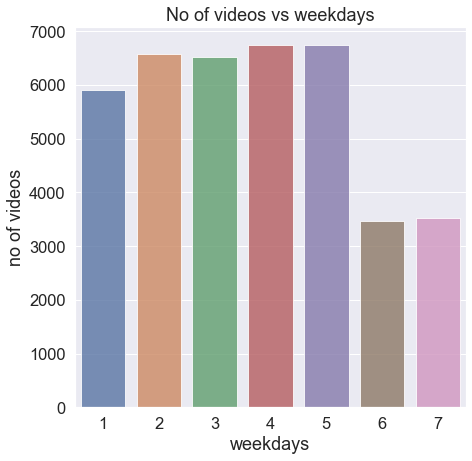

In [161]:
count=youtube["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

## 4.Correlation  Matrix


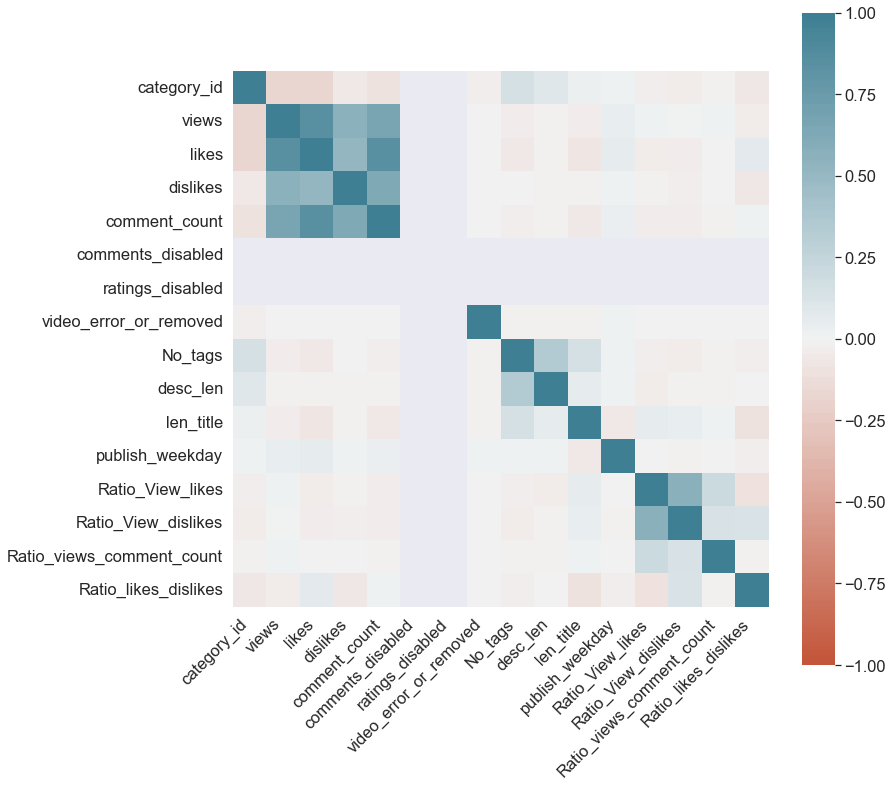

In [162]:
data = youtube

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Removing non Correlated coloumns

In [163]:
youtube.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

In [164]:
youtube.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,22,748374,57527,2966,15954,False,False,False,1,1410,34,1,13.009,252.318,46.908,19.395
1,24,2418783,97185,6146,12703,False,False,False,4,630,62,1,24.888,393.554,190.410,15.813
2,23,3191434,146033,5339,8181,False,False,False,23,1177,53,7,21.854,597.759,390.103,27.352
3,24,343168,10172,666,2146,False,False,False,27,1403,32,1,33.737,515.267,159.911,15.273
4,24,2095731,132235,1989,17518,False,False,False,14,636,24,7,15.849,1053.661,119.633,66.483


## 5.Machine Learning Models

## 5.1 Prediciting Views

### 5.1.1 spliting the data into train and test in ratio of  80:20 

In [165]:
views=youtube['views']
youtube_view=youtube.drop(['views'],axis=1,inplace=False)

In [166]:
train,test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)

In [167]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(31596, 15) (7900, 15) (31596,) (7900,)


## 5.1.2 Linear Regression

In [168]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 5887218.10274318
Variance score: 0.79
Result : 0.7928920076258936
       True Labels  Predicted Labels
32824       465151      7.856265e+05
32825      1433725      3.035968e+06
32826       204246      6.562976e+05
32827       774092      1.062602e+06
32828      4155055      1.540835e+06
...            ...               ...
40943      8259128      1.428362e+07
40944      1685609      1.418409e+06
40946      1066451      1.504056e+06
40947      5660813      5.217624e+06
40948     10306119      1.506149e+07

[7900 rows x 2 columns]


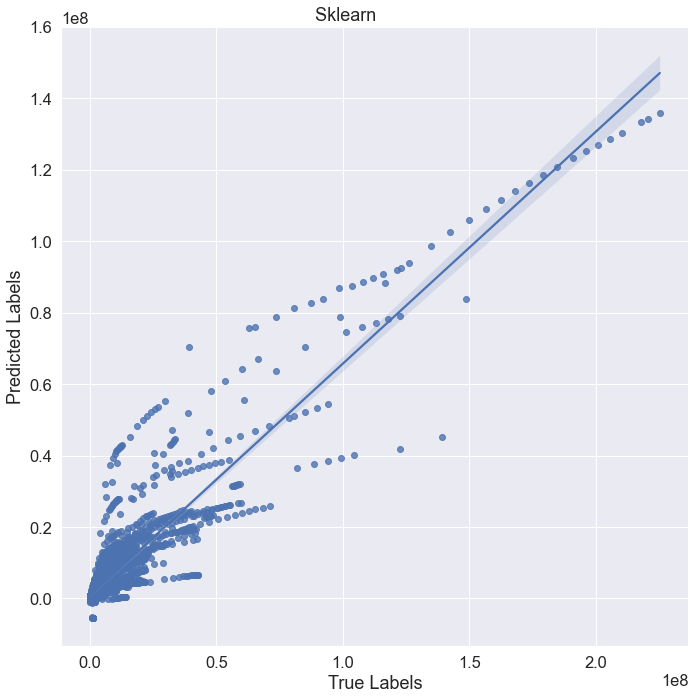

In [169]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## 5.1.3 Random Forest

## 5.1.3.1 Hyper-parameter Turning

In [170]:
# from sklearn.ensemble import RandomForestRegressor
# nEstimator = [140,160,180,200,220]
# depth = [10,15,20,25,30]

# RF = RandomForestRegressor()
# hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
# gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
# gsv.fit(train, y_train)
# print("Best HyperParameter: ",gsv.best_params_)
# print(gsv.best_score_)
# scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
# plt.xlabel('n_estimators')
# plt.ylabel('max_depth')
# plt.colorbar()
# plt.xticks(np.arange(len(nEstimator)), nEstimator)
# plt.yticks(np.arange(len(depth)), depth)
# plt.title('Grid Search r^2 Score')
# plt.show()
# maxDepth=gsv.best_params_['max_depth']
# nEstimators=gsv.best_params_['n_estimators']

## 5.1.3.2 Random Forest using Optimal Hyperparameter

In [171]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
# model.fit(train, y_train)


# # predicting the  test set results
# y_pred = model.predict(test)
# print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print("Result :",model.score(test, y_test))
# d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
# SK = pd.DataFrame(data = d1)
# print(SK)

In [172]:
# lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
# fig1 = lm1.fig 
# fig1.suptitle("Sklearn ", fontsize=18)
# sns.set(font_scale = 1.5)


## 5.2 Prediciting Likes

### 5.2.1 spliting the data into train and test in ratio of  80:20 

In [173]:
likes=youtube['likes']
youtube_like=youtube.drop(['likes'],axis=1,inplace=False)

In [174]:
train,test,y_train,y_test=train_test_split(youtube_like,likes, test_size=0.2,shuffle=False)

In [175]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(31596, 15) (7900, 15) (31596,) (7900,)


### 5.2.2 Linear Regression

In [176]:
# # REGRESSION ANALYSIS

# # LINEAR REGRESSION

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# model = LinearRegression()
# model.fit(train, y_train)

# # predicting the  test set results
# y_pred = model.predict(test)
# print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print("Result :",model.score(test, y_test))
# d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
# SK = pd.DataFrame(data = d1)
# print(SK)

In [177]:
# lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
# fig1 = lm1.fig 
# fig1.suptitle("Sklearn ", fontsize=18)
# sns.set(font_scale = 1.5)

### 5.2.3 Random Forest

### 5.2.3.1 Hypermeter Turning

In [178]:
# from sklearn.ensemble import RandomForestRegressor

# nEstimator = [140,160,180,200,220]
# depth = [10,15,20,25,30]

# RF = RandomForestRegressor()
# hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
# gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
# gsv.fit(train, y_train)
# print("Best HyperParameter: ",gsv.best_params_)
# print(gsv.best_score_)
# scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
# plt.xlabel('n_estimators')
# plt.ylabel('max_depth')
# plt.colorbar()
# plt.xticks(np.arange(len(nEstimator)), nEstimator)
# plt.yticks(np.arange(len(depth)), depth)
# plt.title('Grid Search r^2 Score')
# plt.show()
# maxDepth=gsv.best_params_['max_depth']
# nEstimators=gsv.best_params_['n_estimators']

### 5.2.3.2 Random Forest using the optimal hypermeter

In [179]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
# model.fit(train, y_train)


# # predicting the  test set results
# y_pred = model.predict(test)
# print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print("Result :",model.score(test, y_test))
# d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
# SK = pd.DataFrame(data = d1)
# print(SK)

In [180]:
# lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
# fig1 = lm1.fig 
# fig1.suptitle("Sklearn ", fontsize=18)
# sns.set(font_scale = 1.5)

## 5.3 Prediciting No of Comment

### 5.3.1 spliting the data into train and test in ratio of  80:20 

In [181]:
comment_count=youtube['comment_count']
youtube_comment=youtube.drop(['comment_count'],axis=1,inplace=False)

In [182]:
train,test,y_train,y_test=train_test_split(youtube_comment,comment_count, test_size=0.2,shuffle=False)

In [183]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(31596, 15) (7900, 15) (31596,) (7900,)


### 5.3.2 Linear Regression

In [184]:
# # REGRESSION ANALYSIS

# # LINEAR REGRESSION

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# model = LinearRegression()
# model.fit(train, y_train)

# # predicting the  test set results
# y_pred = model.predict(test)
# print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print("Result :",model.score(test, y_test))
# d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
# SK = pd.DataFrame(data = d1)
# print(SK)

In [185]:
# lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
# fig1 = lm1.fig 
# fig1.suptitle("Sklearn ", fontsize=18)
# sns.set(font_scale = 1.5)

### 5.3.3 Random Forest

### 5.3.3.1 Hypermeter Turning

In [186]:
# nEstimator = [140,160,180,200,220]
# depth = [10,15,20,25,30]

# RF = RandomForestRegressor()
# hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
# gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
# gsv.fit(train, y_train)
# print("Best HyperParameter: ",gsv.best_params_)
# print(gsv.best_score_)
# scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
# plt.xlabel('n_estimators')
# plt.ylabel('max_depth')
# plt.colorbar()
# plt.xticks(np.arange(len(nEstimator)), nEstimator)
# plt.yticks(np.arange(len(depth)), depth)
# plt.title('Grid Search r^2 Score')
# plt.show()
# maxDepth=gsv.best_params_['max_depth']
# nEstimators=gsv.best_params_['n_estimators']

### 5.3.3.1 RandomForest optimal Hyper-Parameter

In [187]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
# model.fit(train, y_train)


# # predicting the  test set results
# y_pred = model.predict(test)
# print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print("Result :",model.score(test, y_test))
# d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
# SK = pd.DataFrame(data = d1)
# print(SK)

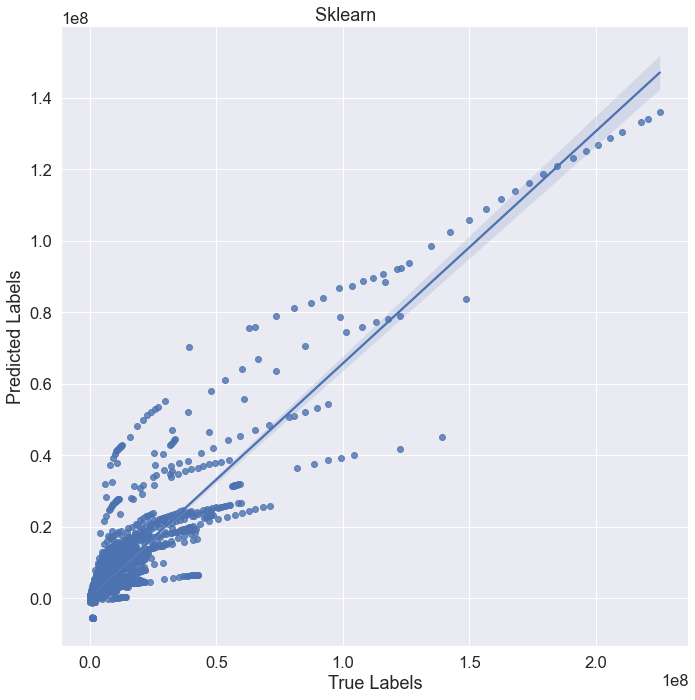

In [188]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 6.Conclusion
### View Predicition

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.73|0.734|
|Random Forests|0.98|0.984|

### Like Predicition

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.41|0.411|
|Random Forests|0.96|0.958|


### No of Comment

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.35|0.35|
|Random Forests|0.81|0.81|
